### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Loading the raw dataset

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### Basic checks

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [5]:
df.describe(include = 'O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
df.shape

(1200, 28)

# Dropping Irrelevant features

In [9]:
df.drop(['EmpNumber'], axis = 1, inplace = True)

# Handling Null Values

In [10]:
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- **There are no Null Values in the dataset**

# Checking for duplicates

In [11]:
df.duplicated().sum()

0

- There are no duplicates

# Handling Outliers

In [12]:
continous_columns = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

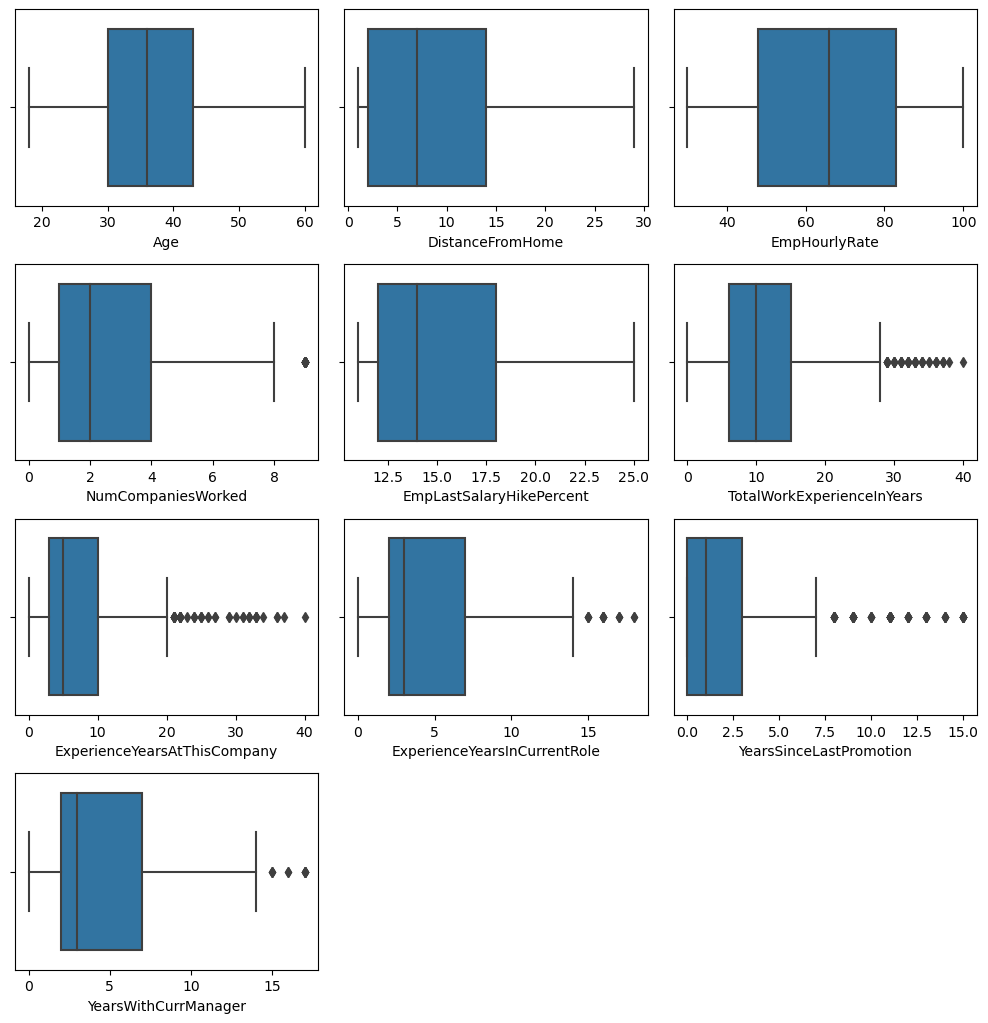

In [13]:
plt.figure(figsize=(10,15), facecolor='white')
index = 1
for i in continous_columns:
    plt.subplot(6,3,index)                             
    sns.boxplot(x = df[i])
    index += 1
plt.tight_layout()
plt.show()

#### We can observe the outliers in the following features:

 1.NumComapniesWorked   
 2.TotalWorkExperienceInYears   
 3.ExperienceYearsAtThisCompany   
 4.ExperienceYearsInCurrentRole    
 5.YearsSinceLastPromotion    
 6.YearsWithCurrManager  

### 1. Dealing outliers in NumCompaniesWorked

In [14]:
lower_limit = df['NumCompaniesWorked'].quantile(0.05)
upper_limit = df['NumCompaniesWorked'].quantile(0.95)

In [15]:
print(lower_limit)
print(upper_limit)

0.0
8.0


In [16]:
df['NumCompaniesWorked'] = np.clip(df['NumCompaniesWorked'],lower_limit,upper_limit)

In [17]:
df['NumCompaniesWorked'].skew()

0.9518940460941532

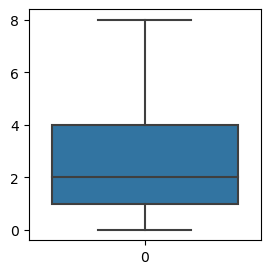

In [18]:
plt.figure(figsize=(3,3))
sns.boxplot(df.NumCompaniesWorked)
plt.show()

### 2. TotalWorkExperienceInYears

In [19]:
lower_limit = df['TotalWorkExperienceInYears'].quantile(0.05)
upper_limit = df['TotalWorkExperienceInYears'].quantile(0.95)

In [20]:
print(lower_limit)
print(upper_limit)

1.0
28.0


In [21]:
df['TotalWorkExperienceInYears'] = np.clip(df['TotalWorkExperienceInYears'],lower_limit,upper_limit)

In [22]:
df['TotalWorkExperienceInYears'].skew()

0.8268398060243719

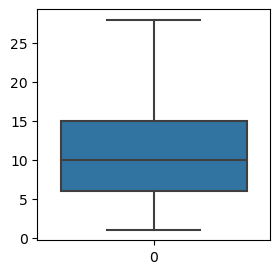

In [23]:
plt.figure(figsize=(3,3))
sns.boxplot(df.TotalWorkExperienceInYears)
plt.show()

### 3. ExperienceYearsAtThisCompany

In [24]:
lower_limit = df['ExperienceYearsAtThisCompany'].quantile(0.05)
upper_limit = df['ExperienceYearsAtThisCompany'].quantile(0.95)

In [25]:
print(lower_limit)
print(upper_limit)

1.0
20.0


In [26]:
df['ExperienceYearsAtThisCompany'] = np.clip(df['ExperienceYearsAtThisCompany'],lower_limit,upper_limit)

In [27]:
df['ExperienceYearsAtThisCompany'].skew()

1.095104472714384

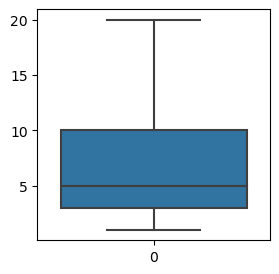

In [28]:
plt.figure(figsize=(3,3))
sns.boxplot(df.ExperienceYearsAtThisCompany)
plt.show()

### 4. ExperienceYearsInCurrentRole

In [29]:
lower_limit = df['ExperienceYearsInCurrentRole'].quantile(0.05)
upper_limit = df['ExperienceYearsInCurrentRole'].quantile(0.95)

In [30]:
print(lower_limit)
print(upper_limit)

0.0
11.0


In [31]:
df['ExperienceYearsInCurrentRole'] = np.clip(df['ExperienceYearsInCurrentRole'],lower_limit,upper_limit)

In [32]:
df['ExperienceYearsInCurrentRole'].skew()

0.4893569209764269

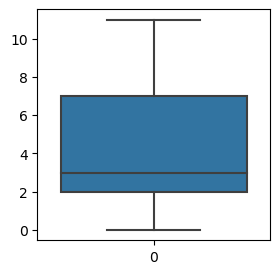

In [33]:
plt.figure(figsize=(3,3))
sns.boxplot(df.ExperienceYearsInCurrentRole)
plt.show()

### 5. YearsSinceLastPromotion

In [34]:
lower_limit = df['YearsSinceLastPromotion'].quantile(0.05)
upper_limit = df['YearsSinceLastPromotion'].quantile(0.95)

In [35]:
print(lower_limit)
print(upper_limit)

0.0
10.0


In [36]:
df['YearsSinceLastPromotion'] = np.clip(df['YearsSinceLastPromotion'],lower_limit,upper_limit)

In [37]:
df['YearsSinceLastPromotion'].skew()

1.5649913450639186

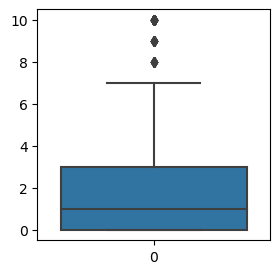

In [38]:
plt.figure(figsize=(3,3))
sns.boxplot(df.YearsSinceLastPromotion)
plt.show()

In [39]:
df['YearsSinceLastPromotion'] = np.log1p(df['YearsSinceLastPromotion'])

In [40]:
df['YearsSinceLastPromotion'].skew()

0.635699945509798

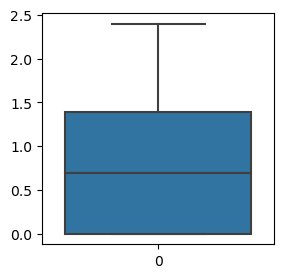

In [41]:
plt.figure(figsize=(3,3))
sns.boxplot(df.YearsSinceLastPromotion)
plt.show()

### 6.YearsWithCurrManager

In [42]:
lower_limit = df['YearsWithCurrManager'].quantile(0.05)
upper_limit = df['YearsWithCurrManager'].quantile(0.95)

In [43]:
print(lower_limit)
print(upper_limit)

0.0
10.0


In [44]:
df['YearsWithCurrManager'] = np.clip(df['YearsWithCurrManager'],lower_limit,upper_limit)

In [45]:
df['YearsWithCurrManager'].skew()

0.42541666194666683

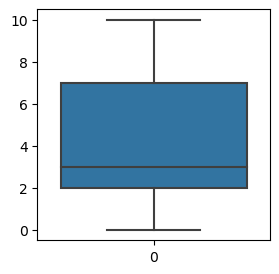

In [46]:
plt.figure(figsize=(3,3))
sns.boxplot(df.YearsWithCurrManager)
plt.show()

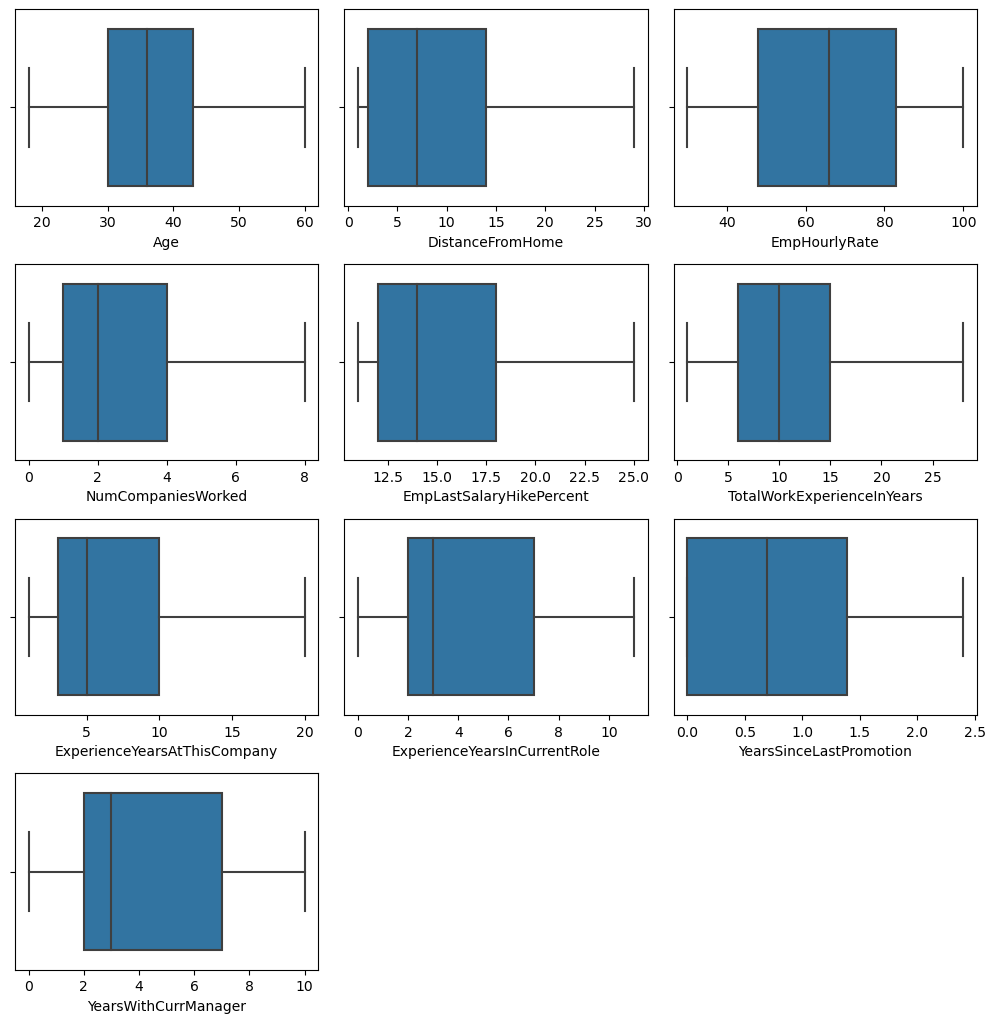

In [47]:
plt.figure(figsize=(10,15), facecolor='white')
index = 1
for i in continous_columns:
    plt.subplot(6,3,index)                             
    sns.boxplot(x = df[i])
    index += 1
plt.tight_layout()
plt.show()

# Conversion of categorical Data to Numerical Data

In [48]:
cat_cols = df.select_dtypes(include=['object']).columns        #categorical columns
cat_cols

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

### 1. Gender

In [49]:
#manual encoding

In [50]:
df.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [51]:
df.Gender = df.Gender.replace({'Male' : 1,'Female' : 0})

In [52]:
df.Gender.value_counts()

Gender
1    725
0    475
Name: count, dtype: int64

### 2. Education Background

In [53]:
#manual encoding

In [54]:
df.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [55]:
df['EducationBackground'] = df['EducationBackground'].replace({'Life Sciences' : 5,'Medical' : 4,'Marketing' : 3,'Technical Degree' : 2,'Other' : 1, 'Human Resources' : 0})

In [56]:
df.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

### 3. Marital Status

In [57]:
#label encoder

In [58]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [59]:
label_encoder = LabelEncoder()

In [60]:
df.MaritalStatus = label_encoder.fit_transform(df.MaritalStatus)

In [61]:
df.MaritalStatus.value_counts()

MaritalStatus
1    548
2    384
0    268
Name: count, dtype: int64

### 4. Emp Department

In [62]:
#manual Encoding

In [63]:
df.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [64]:
df['EmpDepartment'] = df['EmpDepartment'].replace({'Sales' : 5,'Development' : 4,'Research & Development' : 3,'Human Resources' : 2,'Finance' : 1, 'Data Science' : 0})

In [65]:
df.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

### 5. Emp Job Role

In [66]:
#label encoing

In [67]:
df.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [68]:
df.EmpJobRole = label_encoder.fit_transform(df.EmpJobRole)

In [69]:
df.EmpJobRole.value_counts()

EmpJobRole
13    270
3     236
9      94
12     77
14     69
7      64
15     52
8      51
4      49
6      45
18     38
10     33
5      33
1      20
11     19
0      16
16     15
2      12
17      7
Name: count, dtype: int64

### 6. Business Travel Frequency

In [70]:
#manual

In [71]:
df.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [72]:
df.BusinessTravelFrequency = df.BusinessTravelFrequency.replace({'Travel_Rarely' : 2, 'Travel_Frequently' : 1,'Non-Travel' : 0})

In [73]:
df.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

### 7. Over Time

In [74]:
#manual

In [75]:
df.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [76]:
df.OverTime = df.OverTime.replace({'No' : 0,'Yes' : 1})

In [77]:
df.OverTime.value_counts()

OverTime
0    847
1    353
Name: count, dtype: int64

### 8. Attrition

In [78]:
#manual

In [79]:
df.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [80]:
df.Attrition = df.Attrition.replace({'No' : 0,'Yes' : 1})

In [81]:
df.Attrition.value_counts()

Attrition
0    1022
1     178
Name: count, dtype: int64

In [82]:
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0.000000,8,0,3
1,47,1,3,2,5,13,2,14,4,4,...,4,20,2,3,7,7,0.693147,7,0,3
2,40,1,5,1,5,13,1,5,4,4,...,3,20,2,3,18,11,0.693147,10,0,4
3,41,1,0,0,2,8,2,10,4,2,...,2,23,2,2,20,6,2.397895,6,0,3
4,60,1,3,2,5,13,2,16,4,1,...,4,10,1,3,2,2,1.098612,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,4,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0.000000,4,0,4
1196,37,1,5,2,4,15,2,10,2,4,...,1,4,2,3,1,0,0.000000,0,0,3
1197,50,1,4,1,4,15,2,28,1,4,...,3,20,3,3,20,8,1.386294,8,0,3
1198,34,0,4,2,0,1,2,9,3,4,...,2,9,3,4,8,7,2.079442,7,0,3


# Feature Selection

- **Checking Correlation**

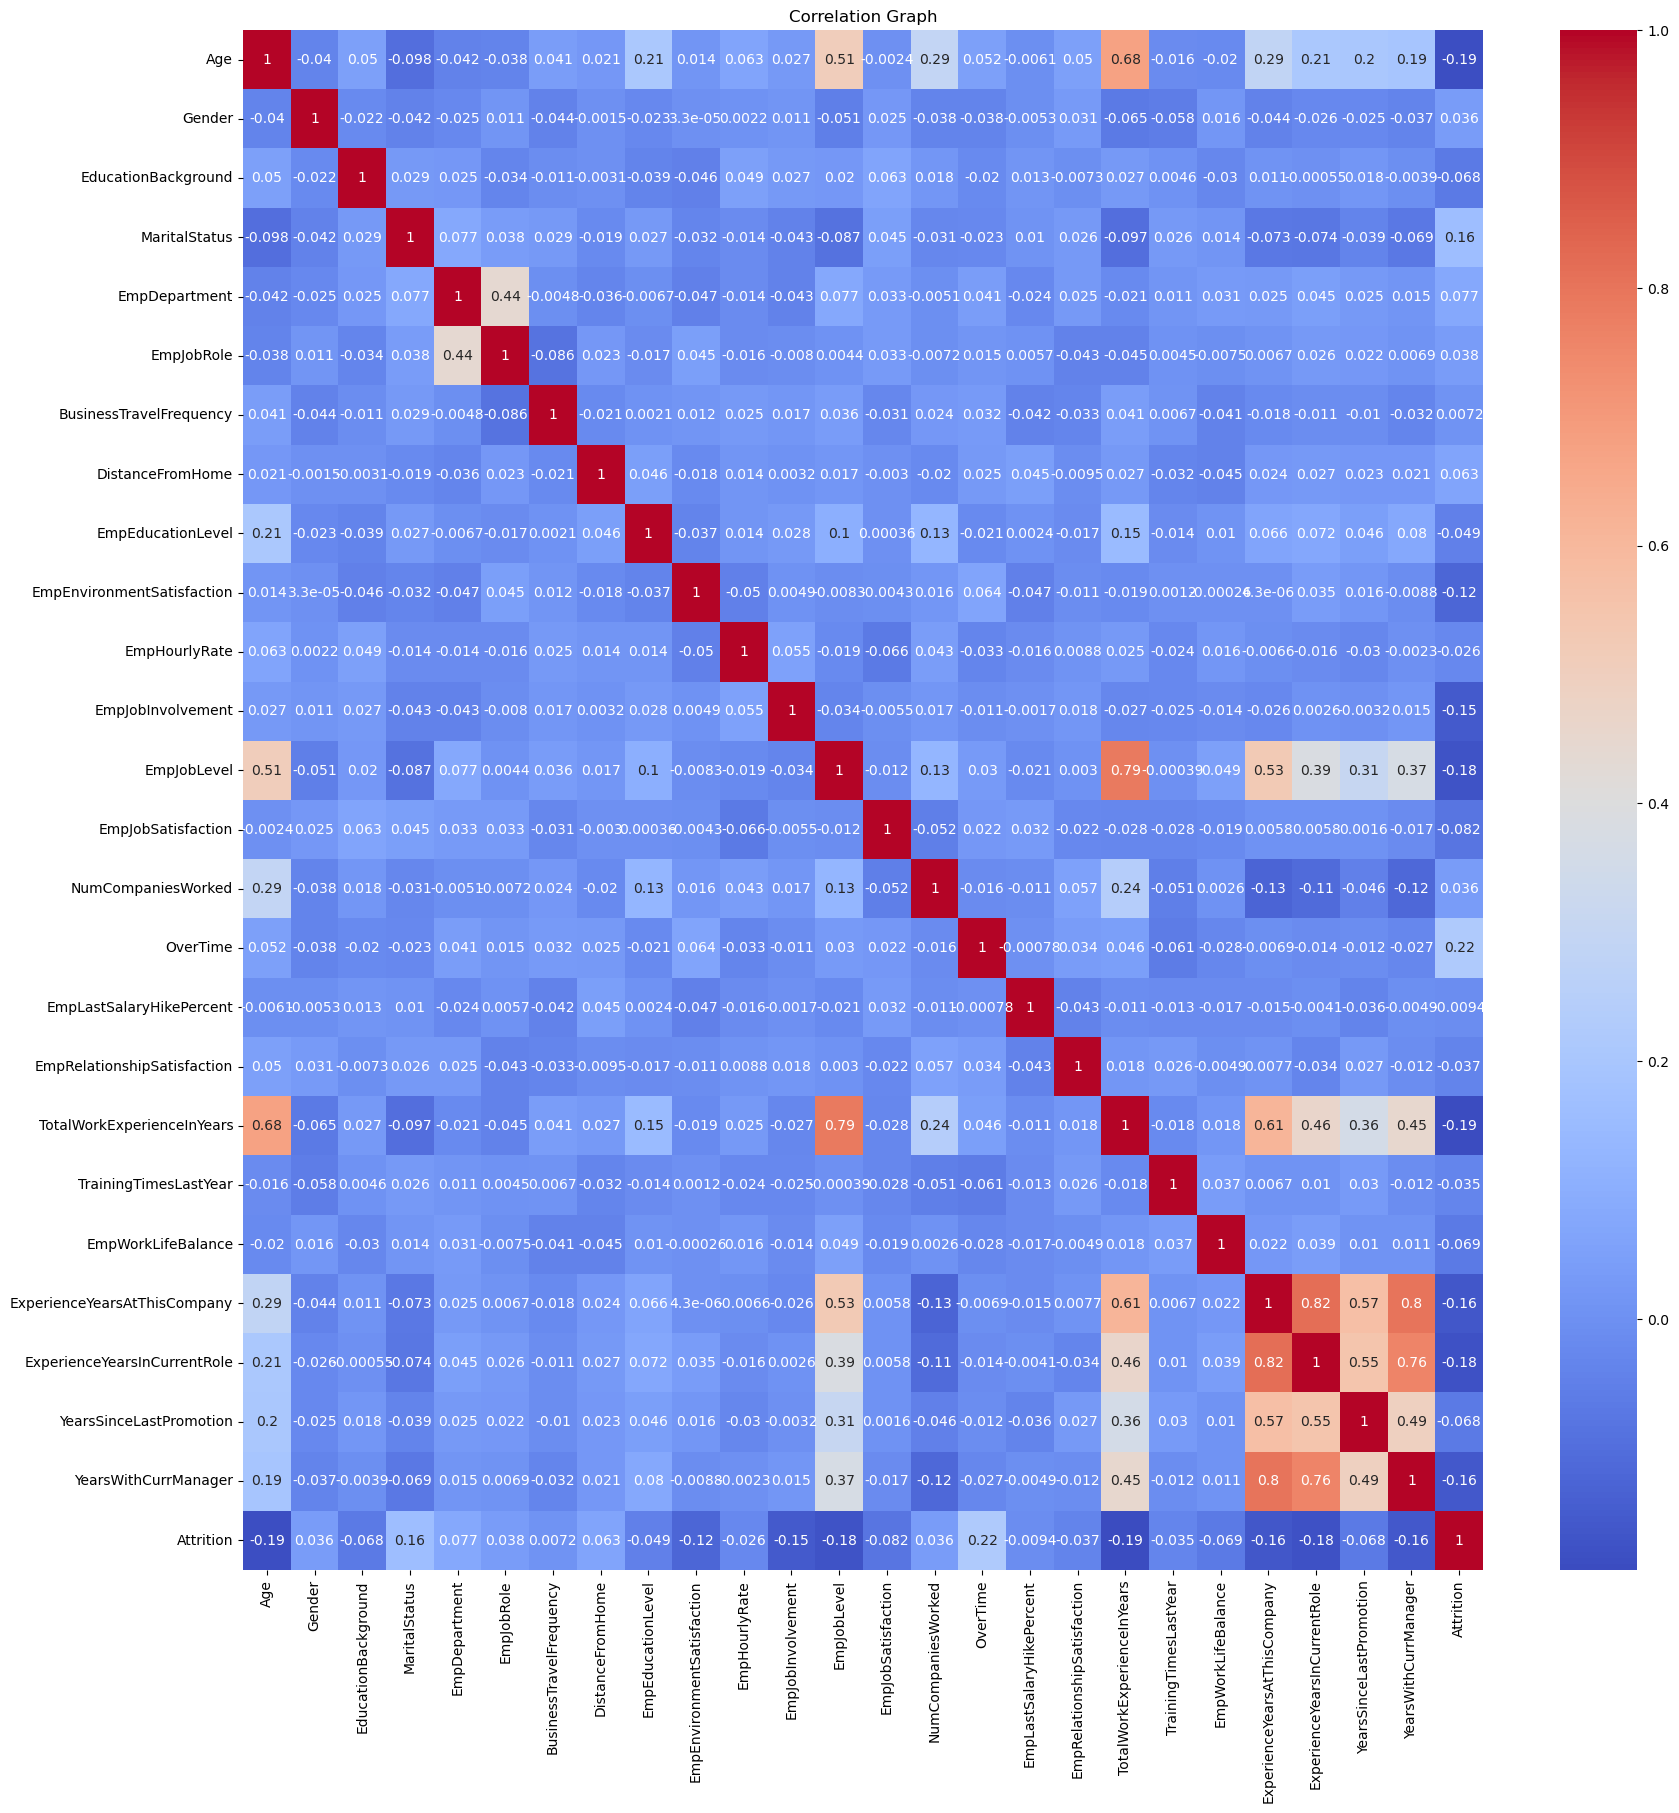

In [83]:
plt.figure(figsize =(20,20))
sns.heatmap(df.drop('PerformanceRating',axis = 1).corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Graph')
plt.show()

- There are no highly correlated variables present in the dataset

# Saving the Processed data

In [84]:
df.to_csv("processed_data.csv", index = False)

In [85]:
processed_data = pd.read_csv('processed_data.csv')
processed_data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0.000000,8,0,3
1,47,1,3,2,5,13,2,14,4,4,...,4,20,2,3,7,7,0.693147,7,0,3
2,40,1,5,1,5,13,1,5,4,4,...,3,20,2,3,18,11,0.693147,10,0,4
3,41,1,0,0,2,8,2,10,4,2,...,2,23,2,2,20,6,2.397895,6,0,3
4,60,1,3,2,5,13,2,16,4,1,...,4,10,1,3,2,2,1.098612,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,4,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0.000000,4,0,4
1196,37,1,5,2,4,15,2,10,2,4,...,1,4,2,3,1,0,0.000000,0,0,3
1197,50,1,4,1,4,15,2,28,1,4,...,3,20,3,3,20,8,1.386294,8,0,3
1198,34,0,4,2,0,1,2,9,3,4,...,2,9,3,4,8,7,2.079442,7,0,3
